# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

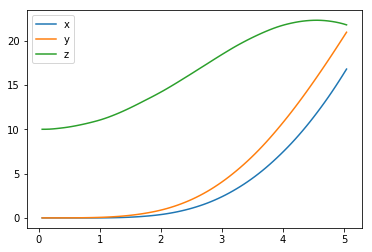

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

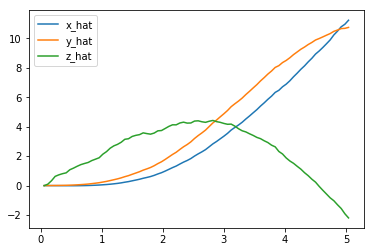

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

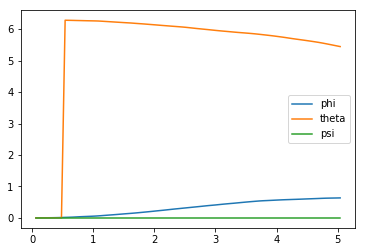

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

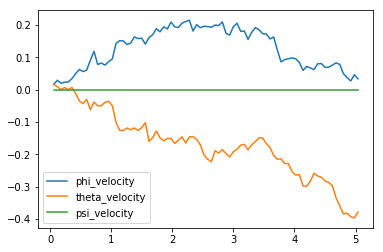

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

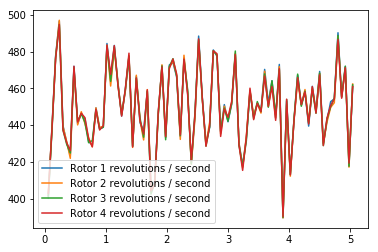

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 16.79214178  20.95040646  21.78519428   0.63592107   5.44544179   0.        ]
[ 11.21979693  10.73315103  -2.19413214]
[ 0.03348498 -0.37831138  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -1.040 (best =  -0.139), noise_scale = 3.2555

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [15]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.agent import DDPG
from my_task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 50.]) # To make it fly to 50m
task = Task(target_pos=target_pos)
agent = DDPG(task) 
best_x = best_y = best_z = 0
df = {} # Initialise empty Dataframes to store data 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if agent.score > agent.best_score:
            best_x, best_y, best_z = task.sim.pose[:3]
        agent.update_score()
        if done:
            displayData = [i_episode, agent.score, agent.best_score] + list(task.sim.pose[:3]) + [best_x, best_y, best_z]
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), last_pos = <{:5.1f},{:5.1f},{:5.1f}>, best_pos = <{:5.1f},{:5.1f},{:5.1f}>".format(*displayData), end="")  # [debug]
            df[i_episode] = {'Episode': i_episode,'Reward':agent.score,'Action':action,'Best_Score':agent.best_score,'Position_x':task.sim.pose[0],'Position_y':task.sim.pose[1],'Position_z':task.sim.pose[2]}
            break
    sys.stdout.flush()

Episode = 1000, score = 1216.575 (best = 3613.290), last_pos = < -0.7,  1.3, 50.3>, best_pos = < 47.8,-17.3, 43.0>

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [16]:
## TODO: Plot the rewards.
import datetime

# Showing example of output data
data = pd.DataFrame(v for k,v in df.items())
tStamp = str(datetime.datetime.now().time()).replace(':','')[:6] # timestamp added to file
data.to_csv('data_' + tStamp + '.csv', index=False) # Write down csv

data.head()

,Action,Best_Score,Episode,Position_x,Position_y,Position_z,Reward
0,"[552.637644505, 694.683216225, 541.447212294, ...",157.098519,1,2.255718,-3.808826,0.0,156.005769
1,"[552.723663337, 694.349566732, 539.306428617, ...",157.098519,2,2.258845,-3.783779,0.0,155.760167
2,"[553.22707279, 695.75030449, 542.327043495, 34...",157.360056,3,2.245718,-3.833010,0.0,156.292024
3,"[858.968301812, 869.407872899, 816.011552045, ...",157.360056,4,4.446456,-3.821919,0.0,154.845270
4,"[900.200999316, 900.224502488, 899.706644054, ...",280.630112,5,23.824908,2.953062,0.0,278.283820


In [17]:
data.describe()

,Best_Score,Episode,Position_x,Position_y,Position_z,Reward
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3523.823195,500.500000,-0.083813,-0.341781,48.480291,1215.483409
std,460.958115,288.819436,4.770488,4.623472,9.140047,204.290842
min,157.098519,1.000000,-61.200888,-63.402220,0.000000,154.845270
25%,3613.289665,250.750000,-0.903093,-0.983708,50.207787,1215.964427
50%,3613.289665,500.500000,-0.003282,-0.058065,50.228795,1216.178072
75%,3613.289665,750.250000,0.851420,0.763534,50.263415,1216.414369
max,3613.289665,1000.000000,54.044825,61.261697,51.623833,3613.289665


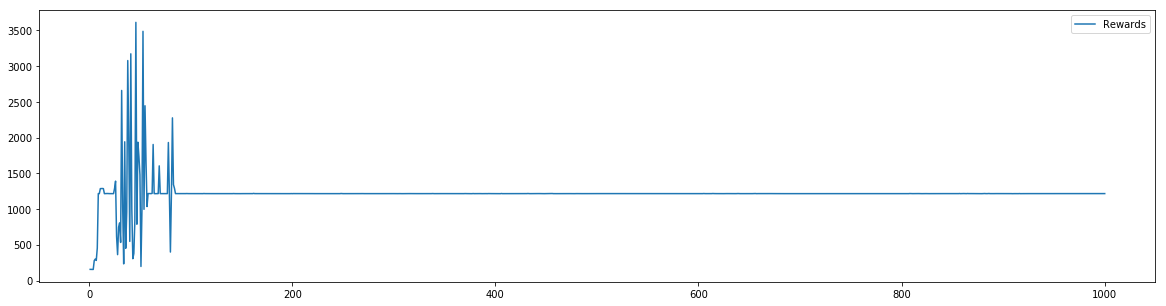

In [18]:
plt.figure(figsize=(20,5))
plt.plot(data['Episode'], data['Reward'], label='Rewards')
plt.legend()

In [47]:
data.head(25) # To provide insights into the spike shown

,Action,Best_Score,Episode,Position_x,Position_y,Position_z,Reward
0,"[552.637644505, 694.683216225, 541.447212294, ...",157.098519,1,2.255718,-3.808826,0.000000,156.005769
1,"[552.723663337, 694.349566732, 539.306428617, ...",157.098519,2,2.258845,-3.783779,0.000000,155.760167
2,"[553.22707279, 695.75030449, 542.327043495, 34...",157.360056,3,2.245718,-3.833010,0.000000,156.292024
3,"[858.968301812, 869.407872899, 816.011552045, ...",157.360056,4,4.446456,-3.821919,0.000000,154.845270
4,"[900.200999316, 900.224502488, 899.706644054, ...",280.630112,5,23.824908,2.953062,0.000000,278.283820
5,"[899.975859727, 898.830569594, 899.244919756, ...",302.447946,6,10.557561,6.254499,0.000000,300.177817
6,"[895.359191195, 899.227178188, 894.404725064, ...",302.447946,7,2.894241,5.995169,0.000000,281.198831
7,"[900.116125055, 900.391109823, 899.990169153, ...",456.177368,8,5.540646,16.018595,0.000000,454.272616
8,"[899.562657066, 900.271556152, 900.0071871, 89...",1217.001307,9,1.215576,-2.687796,50.350282,1217.001307
9,"[899.791763468, 899.829178082, 900.181565689, ...",1217.001307,10,-0.202818,0.672536,50.190797,1215.608676


In [34]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 

def plot_drone_path(data, num_episodes=1000, intervals=4):
    # Configuration to adjust the amounts of plot to create
    div_amt = int(num_episodes / intervals)
    fig = plt.figure(figsize=plt.figaspect(1/intervals))

    # Plot figures for the episodes above
    for i in range(intervals):
        e_list = [i*div_amt, (i+1)*div_amt]
        ax = fig.add_subplot(1, intervals, i+1, projection='3d')
        x,y,z = [data[(data['Episode'] > e_list[0]) & (data['Episode'] <= e_list[1])][j] for j in ('Position_x', 'Position_y', 'Position_z')]
        ax.plot3D(x, y, z, alpha=0.4, color='red')
        ax.set_xlabel('x',fontweight='bold')
        ax.set_ylabel('y',fontweight='bold')
        ax.set_zlabel('z',fontweight='bold')
        ax.set_xlim([-60, 60])
        ax.set_ylim([-60, 60])
        ax.set_zlim([0, 75])
        ax.set_title("Episode {} to Episode {}".format(*e_list))
    
    return None

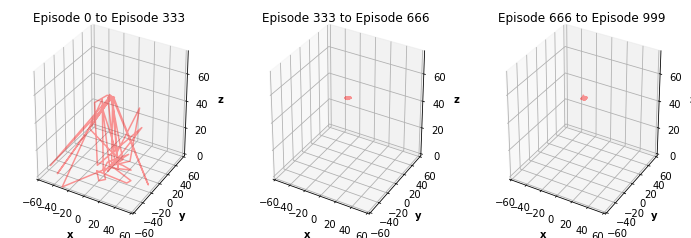

In [38]:
plot_drone_path(data, 1000, 3)

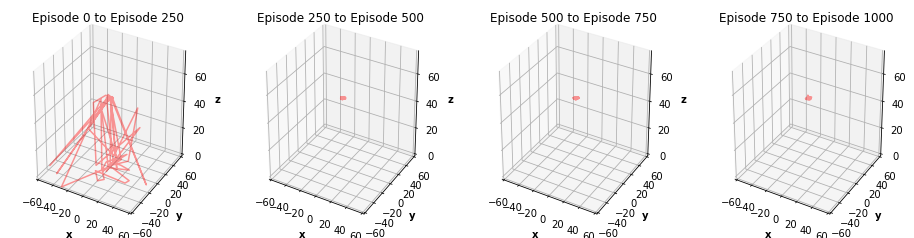

In [39]:
plot_drone_path(data) # Use default arguments

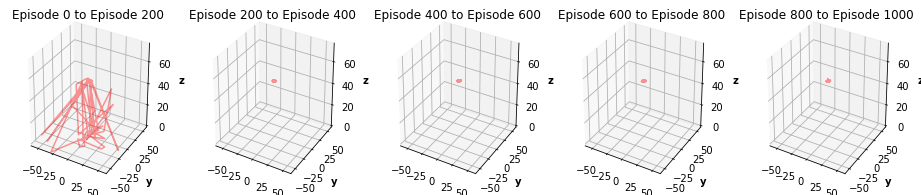

In [40]:
plot_drone_path(data, 1000, 5)

#### Mean Results Over Last 10 Episodes

In [45]:
print('The mean of over last 10 episodes is: {:.4f}'.format(np.mean(data['Reward'][-10:])))

The mean of over last 10 episodes is: 1216.2807


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

- I designed the reward function in task.py with the following format:

        def get_reward(self):
            reward = -0.5
            if self.sim.pose[2] > 0: reward += 0.5*self.sim.pose[2]
            return reward
        
- This is done in conjunction with an additional modification to the step function in task.py with the following line:

        if self.sim.pose[2] >= self.target_pos[2]: done = True
    
    which will deem the process _done_ once it hits my target position specified of [0., 0., 50.]
    

- In general, get_reward rewards the quadcopter for flying above the ground (if self.sim.pose[2] > 0: reward += 0.5*self.sim.pose[2]), so that it can accrue maximum rewards and "dampen" the negative reward accrued in each step for each episode. 


- Given the default gamma of 0.99 used, there's slight discounting of future rewards, so it's encouraged to hit the target position within a finite timeframe to get the maximal reward of 0.5*self.sim.pose[2] and minimise the negative rewards of being on the ground itself. Since it gets a positive reward as long as its above the ground, such a reward function would encourage a more stable movement to the target z-position of 50m rather than one which encourage unstable transitions

---

I've tried a variety of other reward functions, but to no avail (usually not hitting the target position or gives rise to unstable results), some of which were

    1) reward = -0.3*abs([0.005, 0.005, 0.3]*(self.sim.pose[:3] - self.target_pos)).sum()
    
    2) reward = -0.5*(abs(self.sim.pose[:2] - self.target_pos[:2])).sum()
    
    3) reward = self.sim.pose[2]

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

__- What learning algorithm(s) did you try? What worked best for you?__

    I used the Deep Deterministic Policy Gradients (DDPG) algorithm appended in the section of the project. The default Replay Buffer, Actor, Critic, O-U Noise and Agent structure were used. I've tried tuning their hyperparameters such as tau, gamma and the neural network structure in Actor and Critic codes to no success.
---
__- What was your final choice of hyperparameters (such as  𝛼 ,  𝛾 ,  𝜖 , etc.)?__

    It was the default values specified in the sample codes given:
    
        𝛾 = 0.99
        τ = 0.01
        exploration θ = 0.15
        exploration σ = 0.2
        exploration μ = 0
---
__- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.__

    It was the default neural network architecture specified in the sample Actor & Critic codes
    
    The Actor's neural network architecture consists of:
        - A single input layer of 18 units (to correspond with the state_size accordingly) 
        - 3 hidden dense layers of 32, 64 and 32 units respectively, with ReLU activation function used 
        - A final output dense layer of 4 units (to correspond with action_size output accordingly), with sigmoid activation function used
        
    The Critic's neural network architecture consists of:
        - 2 input layers consisting of both states and actions of 18 and 4 units respectively
        - 2 hidden layers of 32 and 64 units, each equipped with ReLU activation function, for each of the input states and actions layer 
        - A "Combination" layer to combine the output generated from the 2 hidden layers (ReLU activation function used), that is in turn generated from each of the states and actions' input layers
        - A final dense output layers to provide the corresponding action value from the "Combination" layer output
        
     

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

__-  Was it an easy task to learn or hard?__

It seems like its an easy task to learn, as it took considerably few episodes for the agent to get the "hang" of what its supposed to achieve. Within 8 episodes, it has a reward value not too dissimilar from the last 10 episodes, where it finally maintained the quadcopter at the target_position for some 800 episodes. 
___
__-  Was there a gradual learning curve, or an aha moment?__

Based on the reward-episodes plot, it seems like its an "aha" moment, where's there a sudden spike in the reward curve at episode 8 and it maintains it stably thereafter (though with some perturbations here and there, since it's still in exploration phase). The mean rewards over the last 10 episodes of 1216 is not too dissimilar from the episode 8's "spiked reward" of 1217 
___
__-  How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)__

The final performance of the agent is considerably good. As depicted in the drone path plots, it does maintain a stable trajectory around the target_position for some 800 episodes. The mean reward over the last 10 episodes is 1216 as shown below.

In [46]:
print('The mean of over last 10 episodes is: {:.4f}'.format(np.mean(data['Reward'][-10:])))

The mean of over last 10 episodes is: 1216.2807


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

__-  What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)__

    The hardest part of this project is probably understanding which part of the code you have to tinker to get the "ideal results". After all, there's a multitude of hyperparameters that can be tuned, whether it is the gamma & tau parameter within DDPG, the network layers within Actor and Critic models and the reward function. This is probably the most difficult project I've encountered, and I still have problems comprehending the overall architecture feedback process, where I would need to spend more time to figure out the nuances.
___
__-  Did you find anything interesting in how the quadcopter or your agent behaved?__

    It seems like the quadcopter behaves quite "crazily" at the start of the 1000 episodes (i.e. the first 200 episodes), where it's still in exploration mode and is in the process of figuring out the optimal policy to adopt, hence the crazy movements depicted in the drone path plot shown above.